<a href="https://colab.research.google.com/github/fradjmag38/CodeClauseInternship_ImagetoPencilSketchApp/blob/main/Image_to_Pencil_Sketch_App_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import tensorflow_hub as hub
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [19]:
model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

Image Preprocessing

In [20]:
def load_image(img_path, img_size):
    img = tf.io.read_file(img_path)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = tf.image.resize(img, (img_size, img_size))
    img = img[tf.newaxis, :]
    return img

In [21]:
# Load content and style images
# put your style and content image
content_image = load_image('/content/bur.jpg', img_size=400)
style_image = load_image('sketch_16.jpeg', img_size=400)

Visualizing input and output images

In [22]:
print("the shape of the content image is :", content_image.shape)
print("the shape of the style image is :", style_image.shape)

the shape of the content image is : (1, 400, 400, 3)
the shape of the style image is : (1, 400, 400, 3)


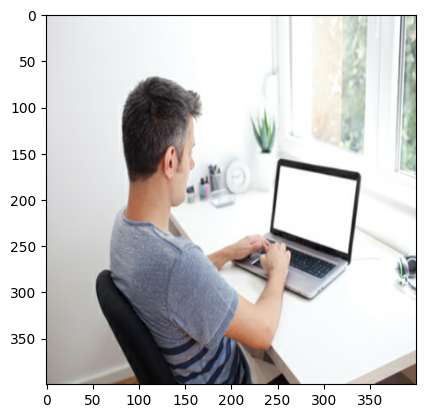

In [23]:
plt.imshow(np.squeeze(content_image))
plt.show()



In [24]:
def crop_image_from_gray(img,tol=7):
    if img.ndim ==2:
        mask = img>tol
        return img[np.ix_(mask.any(1),mask.any(0))]
    elif img.ndim==3:
        gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)  # RGB to Grayscale
        mask = gray_img > tol

        check_shape = img[:,:,0][np.ix_(mask.any(1),mask.any(0))].shape[0]
        if (check_shape == 0): # image is too dark so that we crop out everything,
            return img # return original image
        else:
            img1=img[:,:,0][np.ix_(mask.any(1),mask.any(0))]
            img2=img[:,:,1][np.ix_(mask.any(1),mask.any(0))]
            img3=img[:,:,2][np.ix_(mask.any(1),mask.any(0))]
    #         print(img1.shape,img2.shape,img3.shape)
            img = np.stack([img1,img2,img3],axis=-1)
    #         print(img.shape)
        return img

In [25]:
crop_image_from_gray(style_image,7)

Stylize the image

In [26]:
generated_image = model(tf.constant(content_image), tf.constant(style_image))[0]

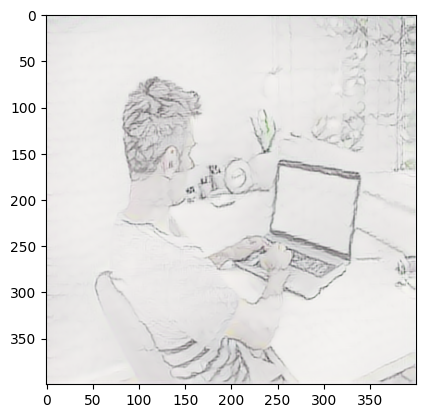

In [27]:
# Display the generated image
plt.imshow(np.squeeze(generated_image))
plt.show()